<a href="https://colab.research.google.com/github/Jiwon510/KNUT_Club/blob/master/%ED%9A%8C%EA%B7%80_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 분류vs회귀
# 분류 : 예측결과가 이름 혹은 문자
# 회귀 : 예측결과가 숫자일 때

In [3]:
# 데이터 준비

import numpy as np

# 농어 길이&무게
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

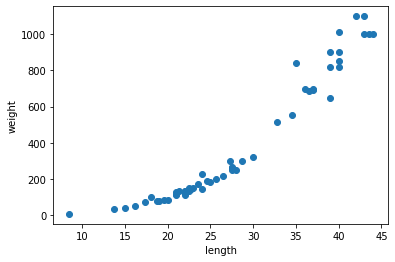

In [4]:
# 산점도로 표시

import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [5]:
# 훈련세트 준비

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
    )

# 튜플 : ex (1,)

# reshape : 1차원 배열을 2차원 배열로 변경
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)


In [6]:
# 회귀 모델 훈련

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

# 결정계수
knr.score(test_input, test_target)

0.992809406101064

In [7]:
# 절대값 오차 - 결정계수에서 발생하는 오차범위를 출력

from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [8]:
# 과대적합 - train 결정계수는 높지만, test 결정계수 점수가 낮은 경우
# 해결책 - 이웃 갯수를 증가

# 과소적합 - train 결정계수는 낮지만, test 결정계수 점수가 높은 경우
# 해결책 - 이웃 갯수를 감소

# 이웃점 갯수 줄이기 
knr.n_neighbors = 3
knr.fit(train_input, train_target)

print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609


[1033.33333333]


<function matplotlib.pyplot.show>

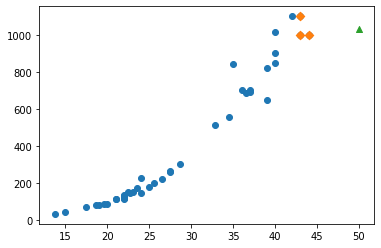

In [9]:
# 50cm 농어의 무게 예측
print(knr.predict([[50]]))

# 50cm 농어의 이웃
distances, indexes = knr.kneighbors([[50]])

# 산점도
plt.scatter(train_input, train_target)

# 이웃 데이터만 산점도에 작성
plt.scatter (train_input[indexes], train_target[indexes],
             marker='D')

# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.show

# 결론 - 최근접 알고리즘을 통해서는 정확한 예측이 불가능

In [10]:
# 선형회귀

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

# 50cm 농어에 대한 예측
print(lr.predict([[50]]))

# coef_ : 기울기, intercept_ : y절편
print(lr.coef_, lr.intercept_)

[1241.83860323]
[39.01714496] -709.0186449535477


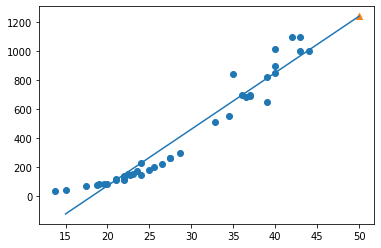

0.939846333997604
0.8247503123313558


In [11]:
# 직선 그리기 

# 산점도 작성
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프 작성
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.show()

# 검증 -> 과대적합
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

In [12]:
# 다항 회귀 

# 데이터 준비 - train과 test데이터 제곱 
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [13]:
# 훈련 
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

print(lr.coef_, lr.intercept_)

# 무게 = 1.01 * 길이^2 - 21.6 * 길이 + 116.05

[1573.98423528]
[  1.01433211 -21.55792498] 116.0502107827827


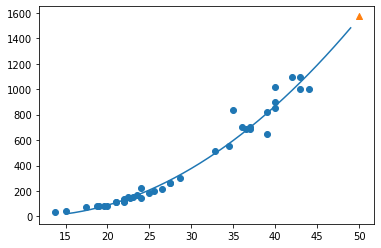

0.9706807451768623
0.9775935108325122


In [14]:
# 직선 그리기

# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열 생성
point = np.arange(15, 50)

# 훈련 세트와 산점도 작성
plt.scatter(train_input, train_target)

# 15에서 40까지 2차 방정식 그래프를 작성
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.show()

# 검증
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

In [15]:
# 다중 회귀 
# csv -> pandas.DataFrame -> numpy


import pandas as pd

# 농어 길이 데이터
df = pd.read_csv('http://bit.ly/perch_csv')
perch_length = df.to_numpy()

print(perch_length)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [16]:
# 농어 무게 데이터
import numpy as np

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [17]:
# 데이터 전처리 
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
    )



In [18]:
from sklearn.preprocessing import PolynomialFeatures

# degree = 2 
poly = PolynomialFeatures()
poly.fit([[2, 3]])

# transform : 기존 데이터를 이용해 새로운 특성 생성
# 1(bias), 2, 3, 2**2, 2*3, 3**2
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


In [19]:
poly = PolynomialFeatures(include_bias = False)

poly.fit(train_input)

# 훈련 데이터
train_poly = poly.transform(train_input)
print(train_poly.shape)

# 테스트 데이터
test_poly = poly.transform(test_input)


(42, 9)


In [20]:
from sklearn.linear_model import LinearRegression

# 훈련
lr = LinearRegression()
lr.fit(train_poly, train_target)

# 검증
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982124
0.9714559911594134


In [21]:
poly = PolynomialFeatures(degree=5, include_bias = False)

poly.fit(train_input)

# 훈련 데이터
train_poly = poly.transform(train_input)

# 테스트 데이터
test_poly = poly.transform(test_input)

print(train_poly.shape)

# 훈련
lr = LinearRegression()
lr.fit(train_poly, train_target)

# 검증 -> 특성이 증가되서 훈련데이터의 결정계수는 매우 증가했지만, 
#         테스트 데이터의 결정 계수는 형편없다.
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

(42, 55)
0.9999999999991097
-144.40579242684848


In [22]:
# 릿지 회귀

# 규제 적용전에 표준화

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [23]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615397


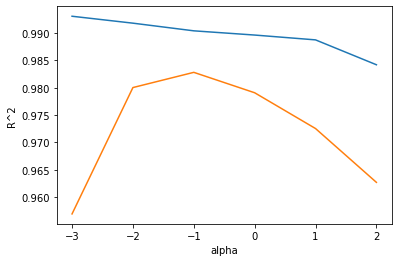

In [26]:
# 적절한 규제 강도 찾기

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  
  # 릿지 모델 생성
  ridge = Ridge(alpha=alpha)
  
  # 릿지 모델 훈련
  ridge.fit(train_scaled, train_target)
  
  # 훈련 점수와 테스트 점수 저장
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

# 지수값을 통해서 x축 나타냄
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()


In [27]:
# 적절한 강도를 통한 릿지회귀
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386926


In [29]:
# 라쏘회귀

from sklearn.linear_model import Lasso 

lasso = Lasso()
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


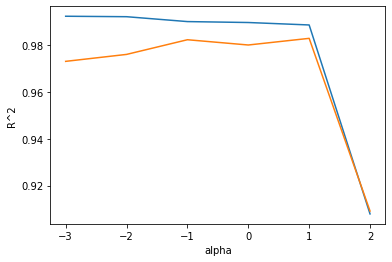

In [32]:
# 표준화

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  
  # 릿지 모델 생성
  lasso = Lasso(alpha = alpha, max_iter=10000)

  # 릿지 모델 훈련
  lasso.fit(train_scaled, train_target)
  
  # 훈련 점수와 테스트 점수 저장
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

# 지수값을 통해서 x축 나타냄
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()


In [33]:
# 적절한 강도를 통한 릿지회귀
from sklearn.linear_model import Ridge

lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [34]:
# 그래프에서 기울기가 0인 값들의 합 - 40개
print(np.sum(lasso.coef_ == 0))

40
